In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math
import numpy as np

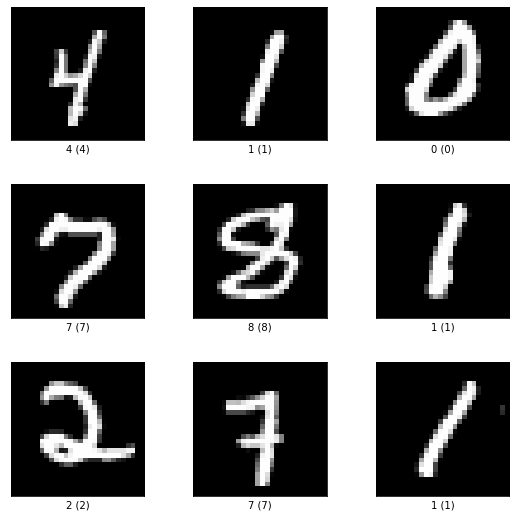

In [3]:
mnist_train, info = tfds.load(name="mnist", split=tfds.Split.TRAIN, with_info=True)
fig = tfds.show_examples(info, mnist_train)

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 36us/sample - loss: 2.3921 - accuracy: 0.7462
Epoch 2/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.6115 - accuracy: 0.8404
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4860 - accuracy: 0.8733
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4287 - accuracy: 0.8903
Epoch 5/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3960 - accuracy: 0.8991
10000/10000 - 0s - loss: 0.2887 - accuracy: 0.9326


[0.288661412794888, 0.9326]

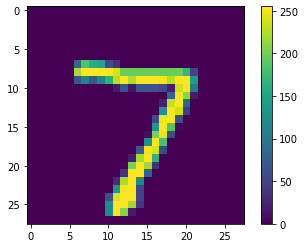

In [7]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
predictions = model.predict(x_test)
np.argmax(predictions[1])
print(type(x_test))

<class 'numpy.ndarray'>


In [98]:
model.save('./models/mnist.h5')

In [99]:
new_model = tf.keras.models.load_model('./models/mnist.h5')

In [101]:
predictions = new_model.predict(x_test)
np.argmax(predictions[1])

2